C:\Users\pmall\AppData\Local\Temp\ipykernel_28876\671810372.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_review_time = data.groupby('vote_bins')['review_age_days'].mean().reset_index(name='average_review_age_days')
C:\Users\pmall\AppData\Local\Temp\ipykernel_28876\671810372.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(bin_labels, rotation=45)


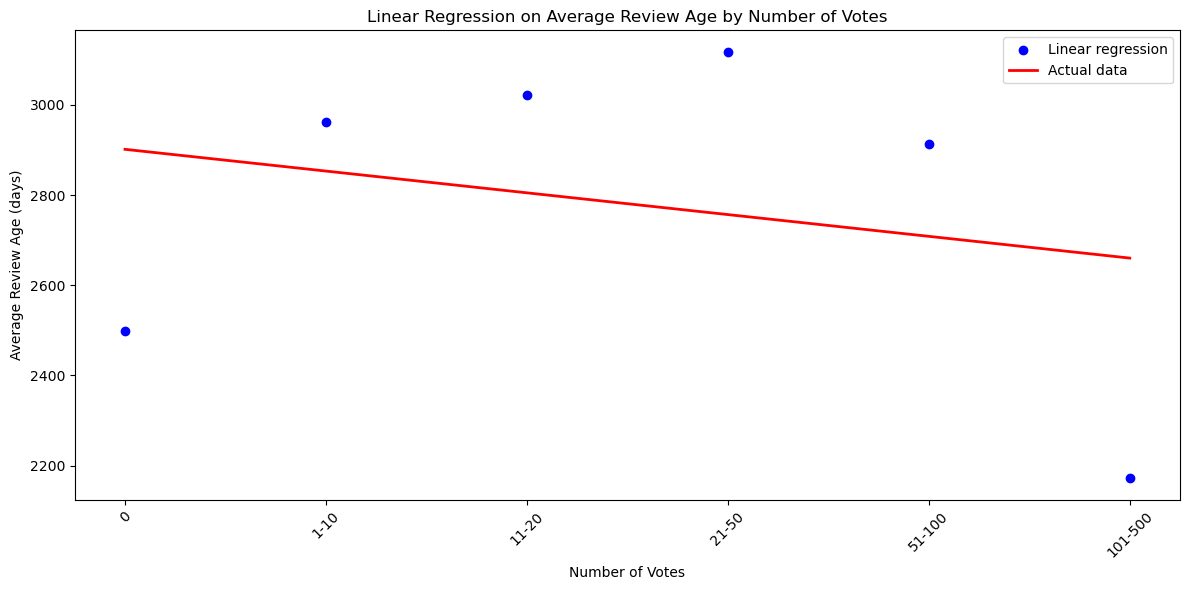

Model slope: -48.25531631598334
Model intercept: 2949.771626092768


In [3]:
# Linear regression for review by age and number of votes

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
import numpy as np

# Load the dataset
data = pd.read_json('C:/USD/ms-aai-501-final-project/data/Software_5-core.json', lines=True)

# Convert 'vote' to numeric and 'reviewTime' to datetime
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')
data['reviewTime'] = pd.to_datetime(data['reviewTime'], format='%m %d, %Y')
data.dropna(subset=['vote'], inplace=True)

# Calculate review age in days
latest_date = data['reviewTime'].max()
data['review_age_days'] = (latest_date - data['reviewTime']).dt.days

# Define bins and labels for vote counts
bins = [-1, 0, 10, 20, 50, 100, 500, 1000, np.inf]
bin_labels = ['0', '1-10', '11-20', '21-50', '51-100', '101-500', '501-1000', '1001+']
data['vote_bins'] = pd.cut(data['vote'], bins=bins, labels=bin_labels)

# Group by binned vote counts and calculate average review age
vote_review_time = data.groupby('vote_bins')['review_age_days'].mean().reset_index(name='average_review_age_days')

# Check for NaN values and handle them
vote_review_time = vote_review_time.dropna(subset=['average_review_age_days'])

# Ensure 'vote_bins' is treated as categorical data
vote_review_time['vote_bins'] = pd.Categorical(vote_review_time['vote_bins'], categories=bin_labels, ordered=True)

# Prepare data for linear regression
X = vote_review_time.index.values.reshape(-1, 1)
y = vote_review_time['average_review_age_days'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(vote_review_time['vote_bins'], y, color='blue')
ax.plot(vote_review_time['vote_bins'], y_pred, color='red', linewidth=2)

ax.set_xlabel('Number of Votes')
ax.set_ylabel('Average Review Age (days)')
ax.set_title('Linear Regression on Average Review Age by Number of Votes')
ax.set_xticklabels(bin_labels, rotation=45)

plt.legend(['Linear regression', 'Actual data'])
plt.tight_layout()
plt.show()

# Print model details
print('Model slope:', model.coef_[0])
print('Model intercept:', model.intercept_)